MSE: 20285841.919087905


/tmp/ipython-input-1415038291.py:42: RuntimeWarning: overflow encountered in matmul
  grad = (2 / n_players) * X_b.T @ (y_pred - y)
/tmp/ipython-input-1415038291.py:43: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * grad


MSE: nan
MSE: nan
MSE: nan
MSE: nan


KeyboardInterrupt: 

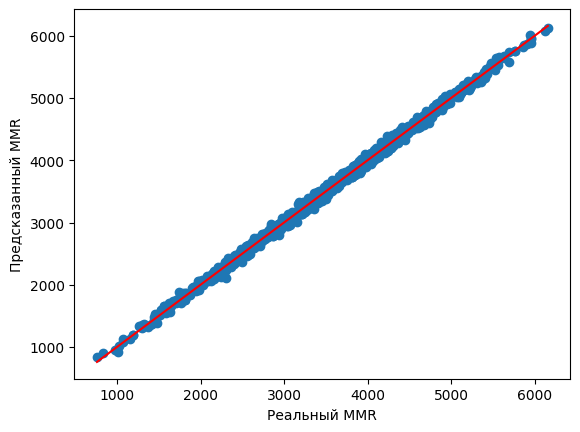

In [13]:
#импорт библиотек numpy для работы с таблицами, matplotlib для графиков
import numpy as np
import matplotlib.pyplot as plt
#устанавливаем сид генерации
np.random.seed(42)
#устанавливаем количество игроков
n_players = 1000
#создаем матрицу(выборку) из количества игроков и 3 признаков, часы, хедшоты, средний урон
X = np.random.rand(n_players,3)
#умножаем наблюдения на подходящие цифры
X[:,0] *= 5000
X[:, 1] *= 100
X[:,2] *= 150
#cоздаем веса, показатели насколько важен тот или иной параметр
true_w = np.array([0.5, 20, 10])
#bias - начальное отклонение
intersept = 500
#Высчитываем настоящие парамтры прибавляя шум +-50(это мы делаем по средству умножения матрицы на веса и добавление стандартного отклонния и добавления шума)
y = (X@true_w + intersept)+np.random.normal(0, 50, size=n_players)
#создаем единичный столбец чтобы предсказать b
ones_column = np.ones((n_players,1))
X_b = np.c_[ones_column,X]
#Высчитываем веса по формуле
w_best = np.linalg.inv(X_b.T @ X_b)@X_b.T @ y

#матрица предсказаний(умножаем матрицу на веса)
y_pred = X_b @ w_best

#ищем ошибку RMSE
errors = y - y_pred
MSE = np.mean(errors**2)
RMSE = np.sqrt(MSE)

plt.scatter(y,y_pred)
lims = [np.min(y), np.max(y)]
plt.plot(lims,lims,color = 'r')
plt.xlabel('Реальный MMR')
plt.ylabel('Предсказанный MMR')

w = np.random.randn(4, 1)
learning_rate = 0.01
n_iterations = 1000
for i in range(n_iterations):
  y_pred = X_b @ w
  grad = (2 / n_players) * X_b.T @ (y_pred - y)
  w = w - learning_rate * grad
  if i%100 ==0:
    print(f"MSE: {np.mean((y - y_pred)**2)}")


In [14]:
#Mean считает среднее по вертекали(из за asix = 0)
X_mean = np.mean(X, axis=0)
#что делает std не знаю
X_std = np.std(X, axis=0)
#мы вычетаем из обычной матрицы средние значения разброса и делим на std я не знаю что это
X_scaled = (X - X_mean) / X_std
#прибавляем к нашей матрице столбец едениц для bias
X_b_scaled = np.c_[np.ones((n_players, 1)), X_scaled]
#Я понял что нам нужно работать с таблицами а не со строкой, но зачем это и что это я так и не понял
y_reshaped = y.reshape(-1, 1)

In [15]:
#тут мы ищем подходящие веса, не понял за что отвечают аргументы в функции randn
w = np.random.randn(4, 1)
# шаг обучения
learning_rate = 0.1
#количество итераций, обычно должно вычеслять пока не найдем идеальный вес
n_iterations = 1000

for i in range(n_iterations):
  #делаем предсказание
    y_pred = X_b_scaled @ w
    #ищем градиент
    grad = (2 / n_players) * X_b_scaled.T @ (y_pred - y_reshaped)
    #уведичиваем вес
    w = w - learning_rate * grad

    if i % 100 == 0:
      #Выводим MSE
        mse = np.mean((y_reshaped - y_pred)**2)
        print(f"Итерация {i}, MSE: {mse}")

print("\nФинальные веса градиентного спуска:\n", w)

Итерация 0, MSE: 13397941.049369402
Итерация 100, MSE: 2518.0569745163834
Итерация 200, MSE: 2518.0569745163816
Итерация 300, MSE: 2518.0569745163816
Итерация 400, MSE: 2518.0569745163816
Итерация 500, MSE: 2518.0569745163816
Итерация 600, MSE: 2518.0569745163816
Итерация 700, MSE: 2518.0569745163816
Итерация 800, MSE: 2518.0569745163816
Итерация 900, MSE: 2518.0569745163816

Финальные веса градиентного спуска:
 [[3508.72614402]
 [ 717.64501008]
 [ 592.37597894]
 [ 436.20983981]]
